**North Dakota Top 20 Cities Population Analysis**

This is a notebook by Olamiposi Agboola

This is a data analytics project that performs an analysis of population data for various cities in North Dakota. The analysis includes data cleaning, data transformation, statistical calculations, data visualization, machine learning and artifiial intelligence predictions. The focus is to understand population trends in the top 20 cities in North Dakota over different census years and predict future population growth.


**1.Import Libraries**

Import all the libraries to be used in this notebook. I prefer to do this at the initial stage and added more libraries as I went along on the project

In [44]:
#Step 1 Import all libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


df = pd.read_excel(r"C:\Users\agboo\Downloads\ND Cities Census 2020.xlsx")
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 25)
df

,Sequence,Geography,Census 2000,Census 2010,Census 2020
0,1,North Dakota,642200,672591,779094
1,2,Abercrombie city,296,263,244
2,3,Adams city,203,127,127
3,4,Alamo city,51,57,53
4,5,Alexander city,217,223,319
...,...,...,...,...,...
356,357,Zap city,231,237,221
357,358,Zeeland city,141,86,82
358,NaN,NaN,NaN,NaN,NaN
359,NaN,NaN,467785,506411,603660


**2. Data Cleaning**

The dataframe was cleaned and formatted in this section. This including stripping the word "city" from the "Geography" column, handling missing values, and converting columns to appropriate data types.I deleted excess rows with incomplete values and streamlined data to the top 20 cities..

In [46]:
df ["Geography"] = df["Geography"].str.strip("city")
df = df.replace('NaN','')
df=df.fillna('')
df

,Sequence,Geography,Census 2000,Census 2010,Census 2020
0,1,North Dakota,642200,672591,779094
1,2,Abercrombie,296,263,244
2,3,Adams,203,127,127
3,4,Alamo,51,57,53
4,5,Alexander,217,223,319
...,...,...,...,...,...
356,357,Zap,231,237,221
357,358,Zeeland,141,86,82
358,,,,,
359,,,467785,506411,603660


In [40]:
# Data Cleaning, removing blank and unneeded rows
index_positions_to_drop = [0, 358, 359, 360]

# Drop the specified rows by index positions
df = df.drop(df.index[index_positions_to_drop])

# Display the DataFrame after deleting the specified rows
print(df)

    Sequence     Geography Census 2000 Census 2010 Census 2020
1          2  Abercrombie          296         263         244
2          3        Adams          203         127         127
3          4        Alamo           51          57          53
4          5    Alexander          217         223         319
5          6        Alice           56          40          41
..       ...           ...         ...         ...         ...
353      354    Woodworth           80          50          44
354      355     Wyndmere          533         429         454
355      356         York           26          23          17
356      357          Zap          231         237         221
357      358      Zeeland          141          86          82

[357 rows x 5 columns]


In [48]:
#Data Cleaning : Removing all decimal points 
# Specify the column names
columns_to_format = ['Census 2000','Census 2010', 'Census 2020',]

# Custom formatting function
def format_value(value):
    if isinstance(value, (int, float)) and float(value).is_integer():
        return int(value)
    else:
        return value

# Apply the custom formatting function to the specified columns
for column in columns_to_format:
    df[column] = df[column].apply(format_value)
print (df)

    Sequence     Geography Census 2000 Census 2010 Census 2020
0          1  North Dakota      642200      672591      779094
1          2  Abercrombie          296         263         244
2          3        Adams          203         127         127
3          4        Alamo           51          57          53
4          5    Alexander          217         223         319
..       ...           ...         ...         ...         ...
356      357          Zap          231         237         221
357      358      Zeeland          141          86          82
358                                                           
359                             467785      506411      603660
360                                  1           1           1

[361 rows x 5 columns]


In [42]:
#The raw data from North Dakota Population center shows 357 cities. For this project I focused on the 20 major cities by population.
# Replace 'column_name' with the actual name of the column you're interested in
column_name = 'Census 2020'

# Convert the column to a numeric data type if possible
# This example assumes the column contains strings that can be converted to integers
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Drop rows with missing or non-convertible values
df = df.dropna(subset=[column_name])

# Get the 20 highest values from the specified column
# Print the resulting DataFrame with the 20 highest values
df = df.nlargest(20, column_name)
df = df.drop (columns = "Sequence")
df = df.reset_index(drop=True)
print(df)

        Geography  Census 2000  Census 2010  Census 2020
0          Fargo         90599       105549       125990
1       Bismarck         55532        61272        73622
2    Grand Forks         49321        52838        59166
3          Minot         36567        40888        48377
4     West Fargo         14940        25830        38626
5      Williston         12512        14716        29160
6      Dickinson         16010        17787        25679
7         Mandan         16718        18331        24206
8      Jamestown         15527        15427        15849
9       Wahpeton          8586         7766         8007
10   Devils Lake          7222         7141         7192
11   Valley City          6826         6585         6575
12  Watford City          1435         1744         6207
13       Lincoln          1730         2406         4257
14       Grafton          4516         4284         4170
15        Horace           915         2430         3085
16        Beulah          3152 

**3 Data Exploration**

In this section, the aim was to showpopulationetrends of the top 20 cities in North Dakota for Census year 2000,2010 & 2020. I also looked out for correlation between all the census years for the top 20 cities in North Dakota..

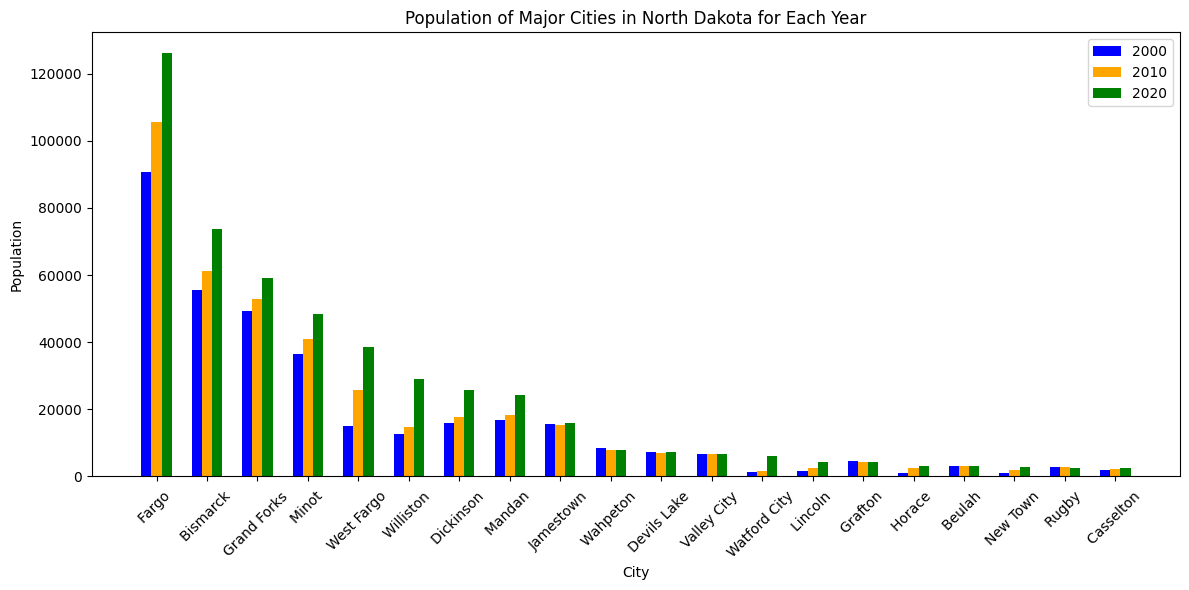

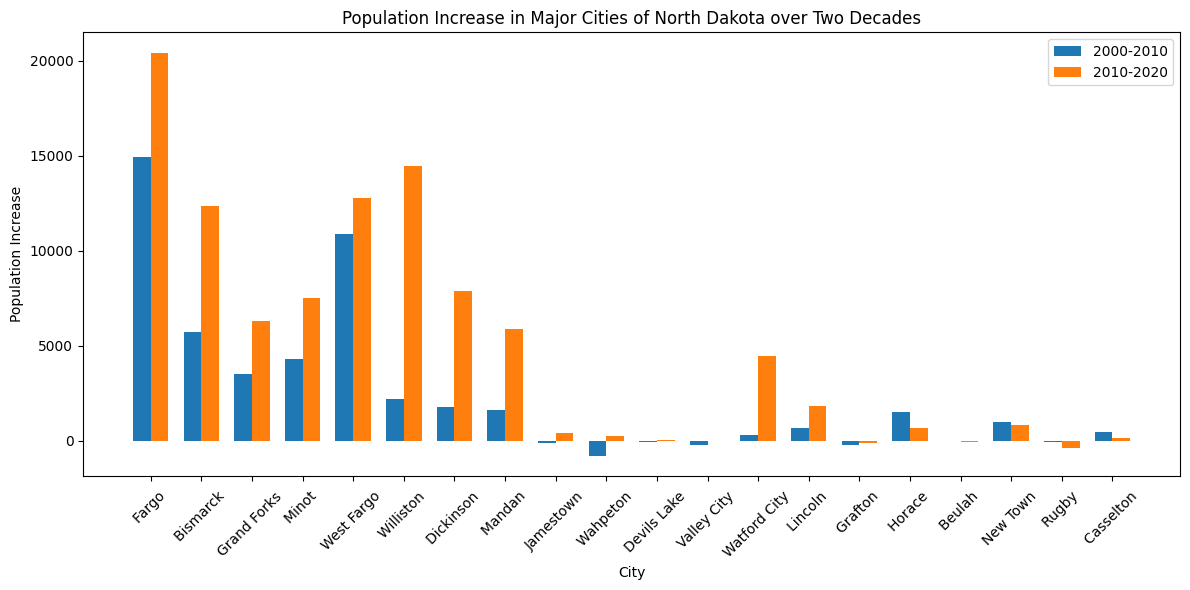

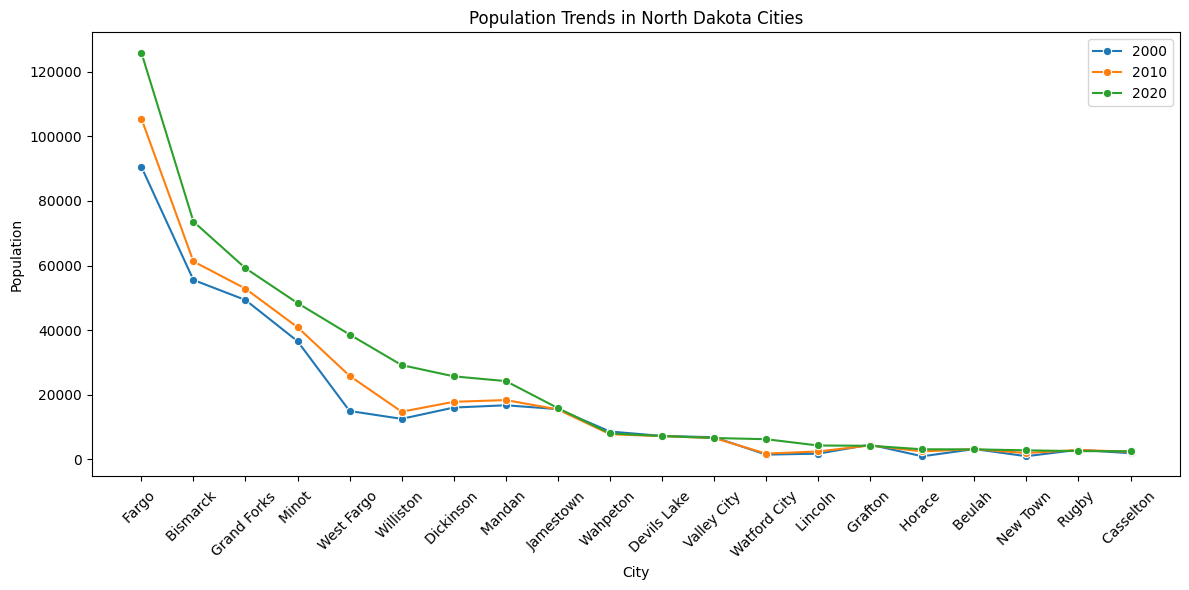

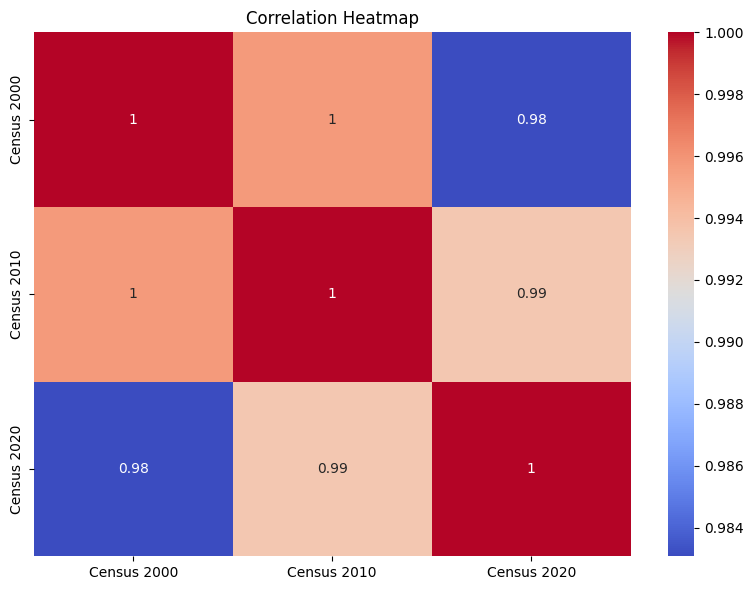

In [28]:
#Step 3 Exploratory Data Analysis with corresponding Visualizations
# Calculate population increases for each year
df['Increase 2000-2010'] = df['Census 2010'] - df['Census 2000']
df['Increase 2010-2020'] = df['Census 2020'] - df['Census 2010']

#Chart 1
# Create a grouped bar chart showing population of Major Cities in North Dakota for Each Census Year
plt.figure(figsize=(12, 6))
bar_width = 0.2

plt.bar(df.index - bar_width, df['Census 2000'], width=bar_width, color='blue', label='2000')
plt.bar(df.index, df['Census 2010'], width=bar_width, color='orange', label='2010')
plt.bar(df.index + bar_width, df['Census 2020'], width=bar_width, color='green', label='2020')

plt.title('Population of Major Cities in North Dakota for Each Year')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(df.index, df['Geography'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Chart 2
# Create a bar chart showing population Increase in Major Cities of North Dakota from 2000 to 2020
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(df.index - bar_width/2, df['Increase 2000-2010'], width=bar_width, label='2000-2010')
plt.bar(df.index + bar_width/2, df['Increase 2010-2020'], width=bar_width, label='2010-2020')

plt.title('Population Increase in Major Cities of North Dakota over Two Decades')
plt.xlabel('City')
plt.ylabel('Population Increase')
plt.xticks(df.index, df['Geography'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Chart 3
# Plot a line graph showing population trends over time in the major 20 cities in North Dakota
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Geography', y='Census 2000', marker='o', label='2000')
sns.lineplot(data=df, x='Geography', y='Census 2010', marker='o', label='2010')
sns.lineplot(data=df, x='Geography', y='Census 2020', marker='o', label='2020')

plt.title('Population Trends in North Dakota Cities')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show

# Chart 4
# Create a correlation heatmap showing possible realtion of population across all Census years 
# Remove non-numeric columns before generating the correlation heatmap
numeric_df = df.drop(columns=['Geography', 'Increase 2000-2010', 'Increase 2010-2020'])

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


**4  Use of Machine learning to predict population for 2025**

In this section of the project, a machine learning model is employed to predict population growth for each city based on historical census data. The following steps outline the process We calculate population growth then the data is prepared for machine learning by selecting relevant features and target variables. ng Sets:
The dataset is split into training and testing sets using the train_test_split sssion Model:
A Linear Regression model is initialized and trained using the training data. The model learns the relationship between the census populations of 2000 and 2010 and their corresponding popula25 Population:
The trained model is then used to predict the population for the year 2025 based on the census populations ofg population growth.

This machine learning approach leverages historical census data to generate predictions for population growth, potentially offering valuable ins.p for the year 2025.

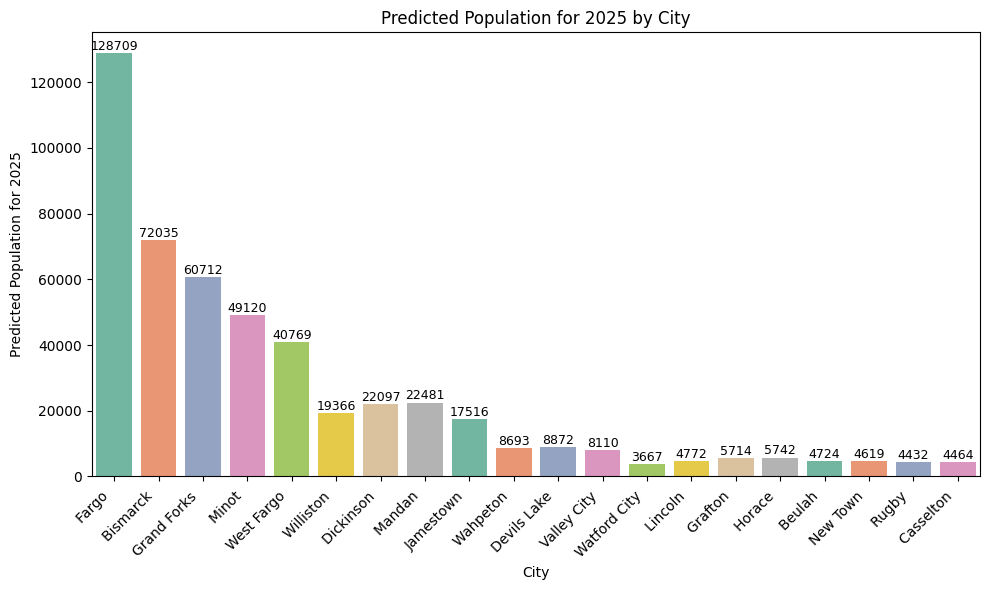

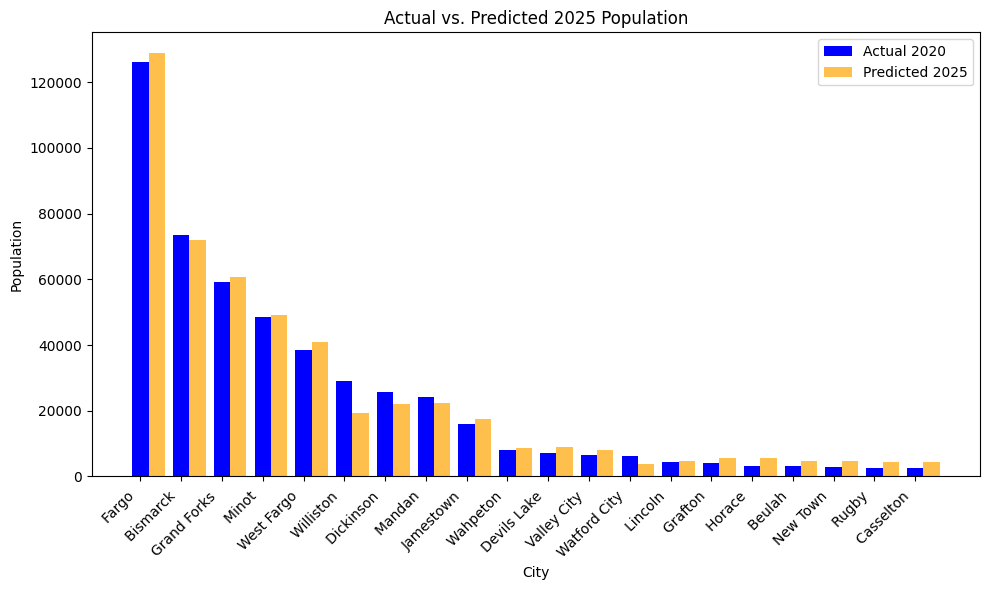

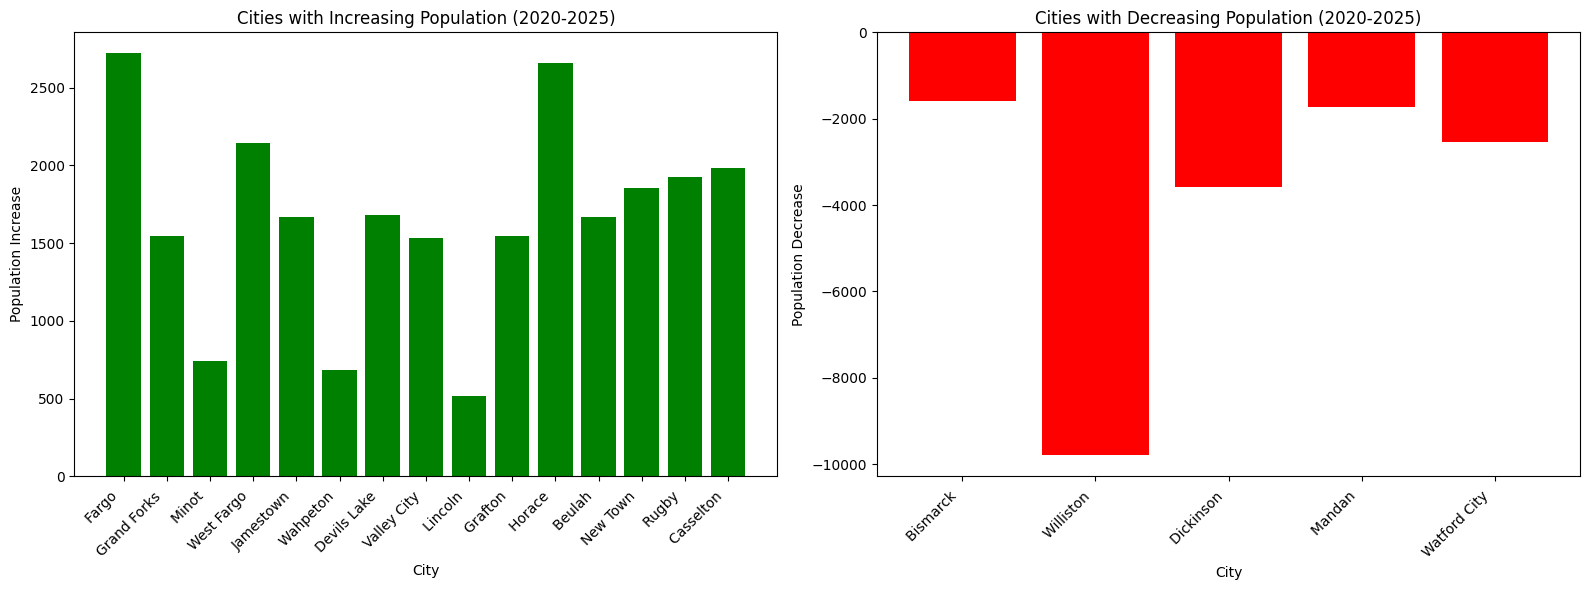

In [29]:
# Applying the a machine learning model to predict population growth for each city
# Calculate population growth for each city
df['Growth 2000-2020'] = df['Census 2020'] - df['Census 2000']

# Prepare the data for machine learning
X = df[['Census 2000', 'Census 2010']]
y = df['Census 2020']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for 2025 population
df['Predicted 2025'] = model.predict(df[['Census 2000', 'Census 2010']])

# Calculate Mean Squared Error
mse = mean_squared_error(df['Census 2020'], df['Predicted 2025'])

# Create a Bar chart to visualize predicted population for 2025
plt.figure(figsize=(10, 6))
sns.barplot(x='Geography', y='Predicted 2025', data=df, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Predicted Population for 2025')
plt.title('Predicted Population for 2025 by City')
plt.tight_layout()

# Add predicted population values as text labels
for i, value in enumerate(df['Predicted 2025']):
    plt.text(i, value + 50, f'{int(value)}', ha='center', va='bottom', fontsize=9, color='black')

plt.show()

# Create a bar chart to visualize Actual vs. Predicted 2025 population
bar_width = 0.4
bar_positions = range(len(df))

plt.figure(figsize=(10, 6))
plt.bar(bar_positions, df['Census 2020'], color='blue', width=bar_width, align='center', label='Actual 2020')
plt.bar([pos + bar_width for pos in bar_positions], df['Predicted 2025'], color='orange', alpha=0.7, width=bar_width, align='center', label='Predicted 2025')
plt.xticks(bar_positions, df['Geography'], rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Population')
plt.title('Actual vs. Predicted 2025 Population')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate the difference between predicted 2025 and actual 2020
df['Difference 2020-2025'] = df['Predicted 2025'] - df['Census 2020']

# Separate data into increasing and decreasing populations
increasing = df[df['Difference 2020-2025'] > 0]
decreasing = df[df['Difference 2020-2025'] < 0]

# Create two bar charts side by side
plt.figure(figsize=(16, 6))  # Increase figure width for better visibility

# Bar chart for cities with increasing population
plt.subplot(1, 2, 1)
plt.bar(increasing['Geography'], increasing['Difference 2020-2025'], color='g')
plt.xlabel('City')
plt.ylabel('Population Increase')
plt.title('Cities with Increasing Population (2020-2025)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Bar chart for cities with decreasing population
plt.subplot(1, 2, 2)
plt.bar(decreasing['Geography'], decreasing['Difference 2020-2025'], color='r')
plt.xlabel('City')
plt.ylabel('Population Decrease')
plt.title('Cities with Decreasing Population (2020-2025)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


**5 Predicting Population using artificial intelligence : Neural network model to predict population for 2025 and 2030.**

This section of the project focuses on predicting population growth for cities using a neural network model.

The following steps outline the process I followed:

- Calculated Population Growth
- Prepared Data for Artificial Intelligence.
- Standardize Input using the StandardScaler from the sklearn.preprocessing module 
- Split Data into Training and Test sets.
- Building the Neural Network Model using the keras library
- Training the Model:The neural network is trained using the data
- Making Predictions and Calculating MSE:
- Predictions for population growth are made using the trained model on the testing data.
- The Mean Squared Error (MSE) is then calculated to assess the quaity of the predictions.
- Visualizing Predicted vs. Actual Growth: A scatter plot is created to visualize the relationship between the actual growth values and the predicted growth values obtained. Additionally, a new visualization is added to plot the predicted populations for the years 2025 and 2030 for each city. This line plot helps visualize the predicted population trends for these future years. The graph displays two lines representing the predicted populations for 2025 and 2030 respectively, allowing for easy comparison between different cities' projected growth. the neural network model.

This approach leverages neural networks to predict population growth based and actual growth values. The neural network's ability to capture complex patterns and relationships in the data makes it a suitable candidate for ting population growth.

1/1 [==============================] - 0s 126ms/step
Neural Network Mean Squared Error: 396246358.7954041


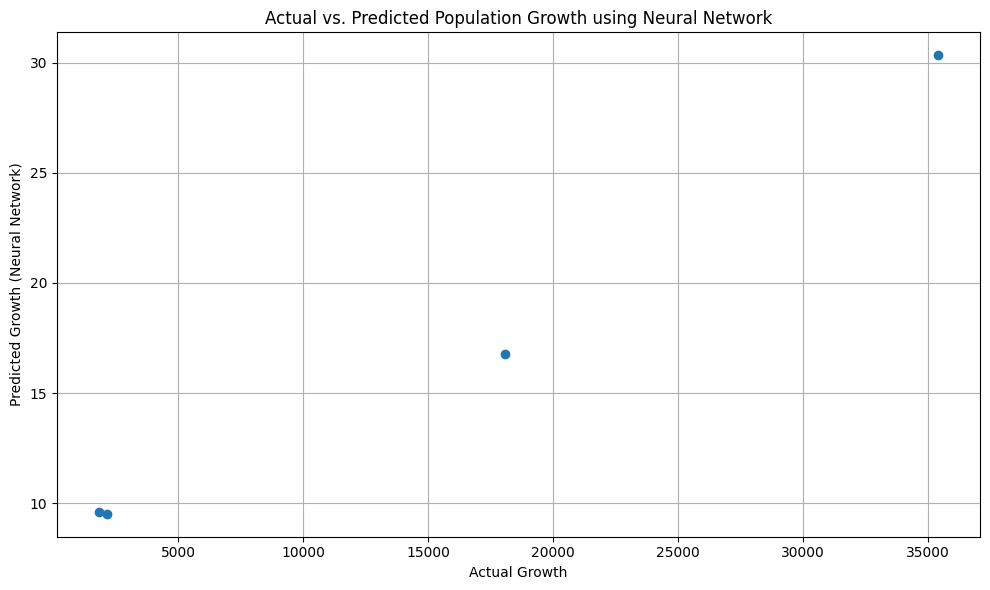

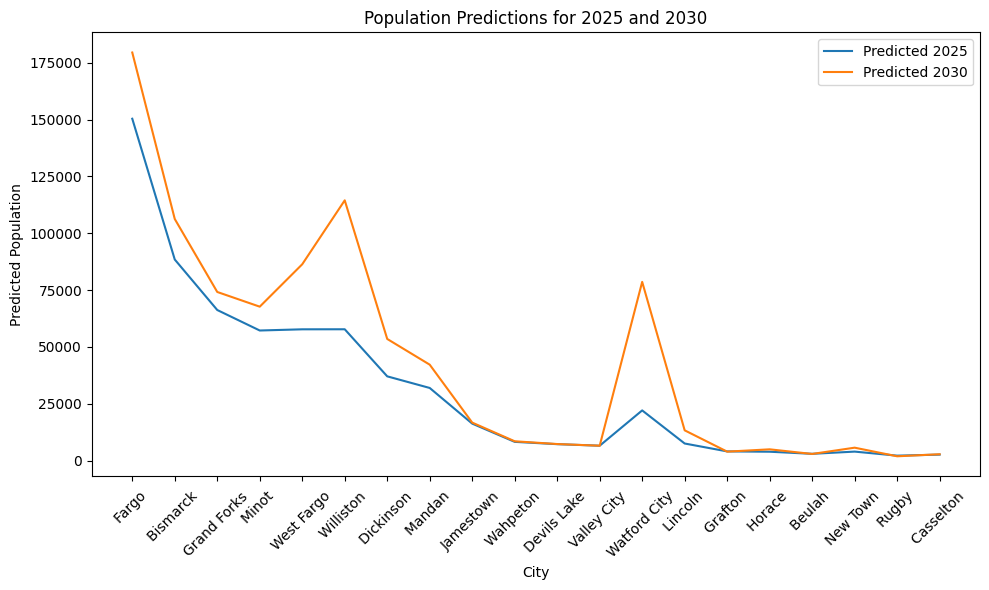

In [37]:
# Calculate population growth for each city
df['Growth 2000-2020'] = df['Census 2020'] - df['Census 2000']

# Prepare the data for artificial intelligence
X = df[['Census 2000', 'Census 2010']]
y = df['Growth 2000-2020']

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a simple neural network model
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_nn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions for population growth
y_pred_nn = model_nn.predict(X_test)

# Calculate Mean Squared Error
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Neural Network Mean Squared Error:", mse_nn)

# Visualize the predicted vs. actual population growth using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn)
plt.xlabel('Actual Growth')
plt.ylabel('Predicted Growth (Neural Network)')
plt.title('Actual vs. Predicted Population Growth using Neural Network')
plt.grid()
plt.tight_layout()
plt.show()

# Visualize the population growth predictions for 2025 and 2030
plt.figure(figsize=(10, 6))
plt.plot(df['Geography'], df['Predicted 2025'], label='Predicted 2025')
plt.plot(df['Geography'], df['Predicted 2030'], label='Predicted 2030')
plt.xlabel('City')
plt.ylabel('Predicted Population')
plt.title('Population Predictions for 2025 and 2030')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**6 Population Growth Analysis and Visualization.**
This section rounds up the project and focuses on analyzing population growth trends and visualizing the projected population figures using the Pandas, Matplotlib, and Seaborn libraries. The primary goals are to calculate growth rates, predict populations for specific years, and provide insightful visualizations for better understanding.

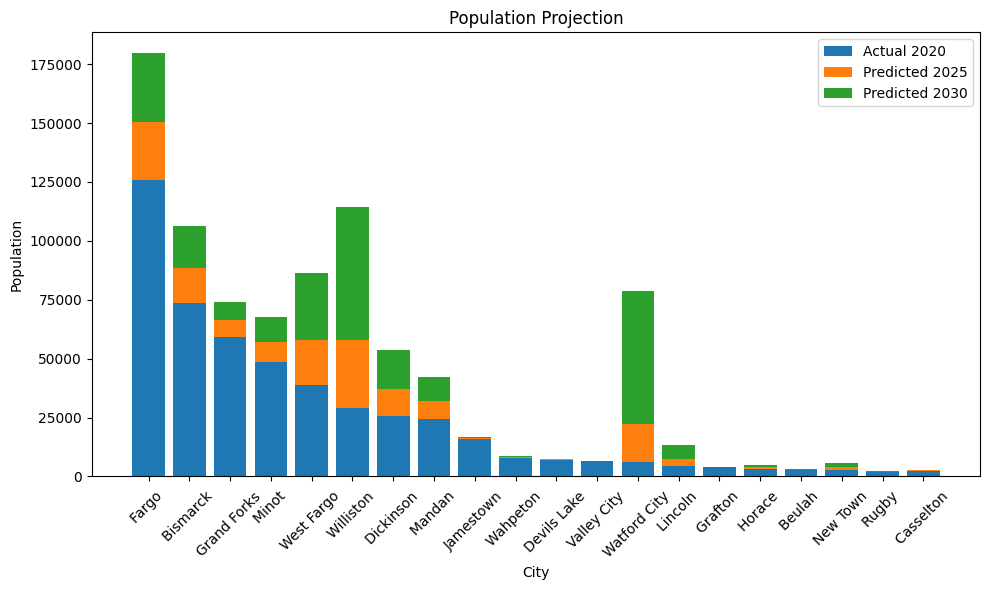

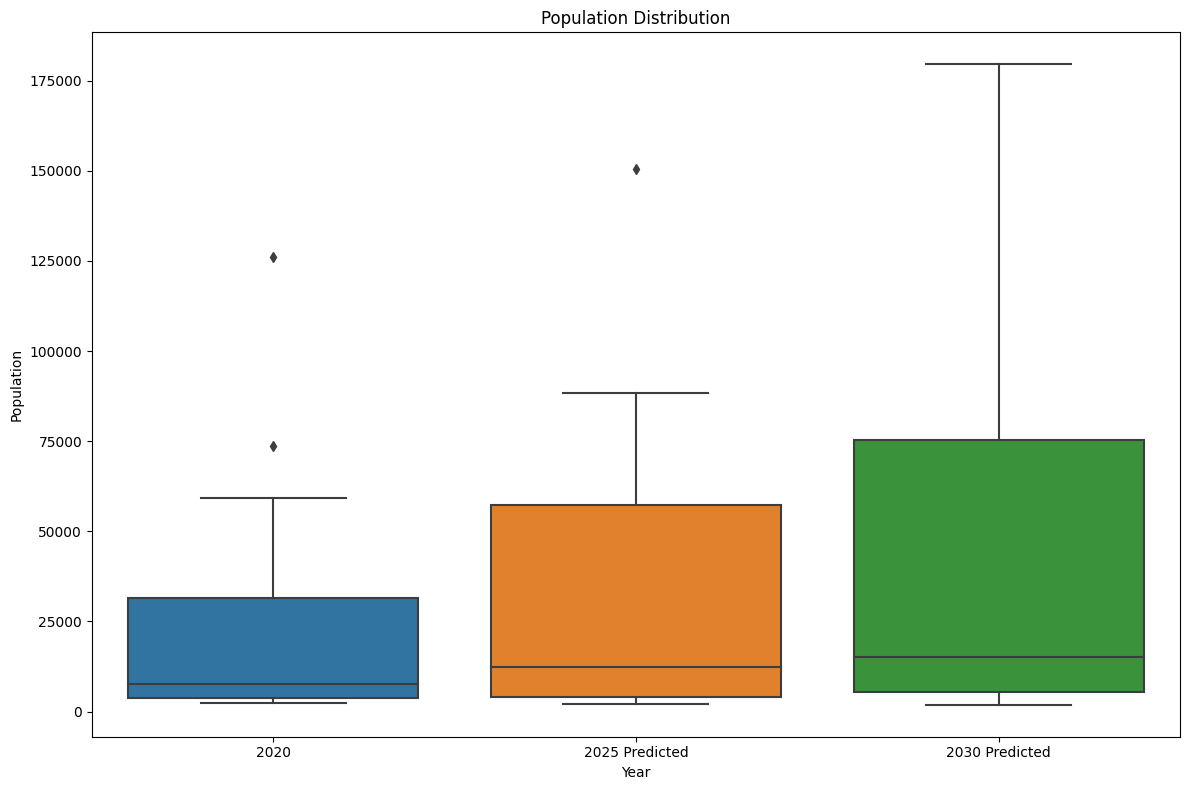

C:\Users\agboo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\agboo\AppData\Local\Temp\ipykernel_17764\268376428.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


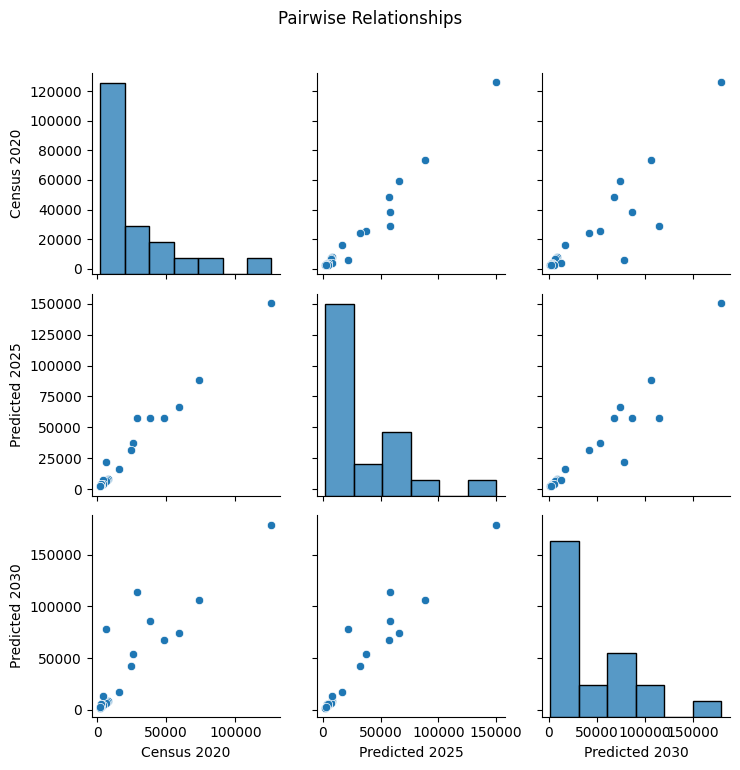

In [36]:
# Calculate growth rate from 2010 to 2020
df['Growth Rate'] = (df['Census 2020'] - df['Census 2010']) / df['Census 2010']

# Predict populations for 2025 and 2030
df['Predicted 2025'] = df['Census 2020'] * (1 + df['Growth Rate'])
df['Predicted 2030'] = df['Predicted 2025'] * (1 + df['Growth Rate'])

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Geography'], df['Census 2020'], label='Actual 2020')
plt.bar(df['Geography'], df['Predicted 2025'] - df['Census 2020'], bottom=df['Census 2020'], label='Predicted 2025')
plt.bar(df['Geography'], df['Predicted 2030'] - df['Predicted 2025'], bottom=df['Predicted 2025'], label='Predicted 2030')
plt.xlabel('City')
plt.ylabel('Population')
plt.title('Population Projection')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Census 2020', 'Predicted 2025', 'Predicted 2030']])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Distribution')
plt.xticks(ticks=[0, 1, 2], labels=['2020', '2025 Predicted', '2030 Predicted'])
plt.tight_layout()
plt.show()

# Create a pairwise plot (scatter matrix)
sns.pairplot(data=df[['Census 2020', 'Predicted 2025', 'Predicted 2030']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.tight_layout()
plt.show()
